<a href="https://colab.research.google.com/github/rk2026/civil/blob/main/UpdateAnotherRaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install rasterio #if not installed.

In [9]:
#Do not delete
import rasterio
from rasterio.mask import mask
import numpy as np
from google.colab import files
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

with rasterio.open('/content/surface_raster.tif') as src:
    surface_array = src.read(1)
    surface_profile = src.profile

with rasterio.open('/content/dem.tif') as src:
    dem_array = src.read(1)
    dem_profile = src.profile

# Ensure both rasters have the same shape
# (Resample surface_array to match dem_array's shape)
from rasterio.warp import reproject, Resampling

surface_array_resampled = np.empty(dem_array.shape, dtype=surface_array.dtype)
reproject(
    source=surface_array,
    destination=surface_array_resampled,
    src_transform=surface_profile['transform'],
    src_crs=surface_profile['crs'],
    dst_transform=dem_profile['transform'],
    dst_crs=dem_profile['crs'],
    resampling=Resampling.nearest  # Choose an appropriate resampling method
)
# Update DEM values where Surface raster has valid values
dem_array[surface_array_resampled != src.nodata] = surface_array_resampled[surface_array_resampled != src.nodata]
# Write the updated DEM to a new file
with rasterio.open('/content/updated_dem.tif', 'w', **dem_profile) as dst:
    dst.write(dem_array, 1)

In [10]:
!gdalinfo /content/surface_raster.tif

/bin/bash: line 1: gdalinfo: command not found


Display the DEM Data

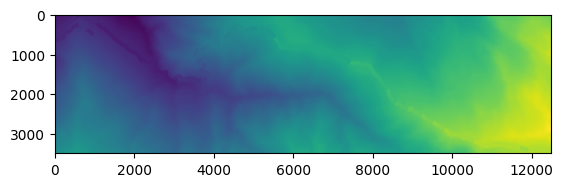

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# prompt: display the updated_dem and download
# Assuming 'updated_dem.tif' is already created from previous code
try:
    with rasterio.open('updated_dem.tif') as src:
        updated_dem = src.read(1)
        show(updated_dem)  # Display the raster
        plt.show()  # Ensure the plot is shown
        files.download('updated_dem.tif') #Download the file
except rasterio.RasterioIOError as e:
    print(f"Error opening or reading updated_dem.tif: {e}")
